In [40]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('misc/advertising.csv')

In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [14]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('sales', axis=1),df.sales, test_size=0.2)

In [41]:
numeric_transformer = Pipeline([ 
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])

In [42]:
lin_reg = Pipeline([    
    ('preprocessor', numeric_transformer),    
    ('regressor', SGDRegressor())    
])


lin_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])), ('regressor', SGDRegressor(alpha=0.0001, average=False, ...m_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False))])

[]

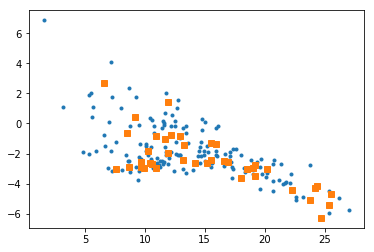

In [43]:
plt.plot(y_train, lin_reg.predict(X_train) - y_train, '.')
plt.plot(y_test, lin_reg.predict(X_test)- y_test, 's')
plt.plot()